<a href="https://colab.research.google.com/github/arad4228/BigData_and_A.I/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 단변수 선형회귀 문제
import numpy as np
import pandas as pd
from google.colab import drive

In [2]:
drive.mount ('/smuai')

Mounted at /smuai


In [3]:
from google.colab import files
files.upload()

Saving nbastat2022.csv to nbastat2022.csv


{'nbastat2022.csv': b"#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EF\r\n1,Joel Embiid,56,33.4,29.9,9.4,19.3,48.9,1.4,3.7,36.5,9.8,11.9,82.1,2.1,9.3,11.4,4.4,1,1.4,3,33.2\r\n2,Giannis Antetokounmpo,59,32.9,29.8,10.2,18.6,54.7,1.1,3.7,30,8.3,11.6,72.1,2,9.5,11.5,5.8,1.1,1.4,3.2,34.8\r\n3,LeBron James,51,36.9,29.5,11.1,21.3,52,2.8,8,35.7,4.5,6,76,1.1,7,8.1,6.2,1.4,1.1,3.5,31.1\r\n4,Luka Doncic,53,35.7,28.2,9.9,21.8,45.5,2.9,8.5,34.1,5.5,7.4,74.4,0.9,8.4,9.3,8.6,1.2,0.6,4.5,29.6\r\n5,Trae Young,64,34.9,28,9.3,20.4,45.6,3,7.8,38,6.5,7.2,90,0.6,3.2,3.8,9.5,1,0.1,4,26.7\r\n6,DeMar DeRozan,65,36.1,27.9,10.2,20.2,50.4,0.6,1.8,35.6,6.9,7.9,87.1,0.8,4.6,5.4,5.2,0.9,0.3,2.4,26.3\r\n7,Ja Morant,55,33.3,27.5,10.2,20.7,49.3,1.6,4.6,34.1,5.5,7.3,76.2,1.3,4.4,5.8,6.7,1.2,0.4,3.4,26\r\n8,Jayson Tatum,66,36.4,26.7,9.2,21,43.9,2.9,8.6,33.7,5.4,6.3,85.4,1.2,7.1,8.3,4.2,1,0.7,2.8,25.3\r\n9,Nikola Jokic,63,33,26,9.9,17.2,57.4,1.5,4.1,35.4,4.8,6,80.8,2.7,11,13.8,8.1,1

In [4]:
nbastat = pd.read_csv('nbastat2022.csv')
nbastat

,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EF
0,1.0,Joel Embiid,56.0,33.4,29.9,9.4,19.3,48.9,1.4,3.7,...,11.9,82.1,2.1,9.3,11.4,4.4,1.0,1.4,3.0,33.2
1,2.0,Giannis Antetokounmpo,59.0,32.9,29.8,10.2,18.6,54.7,1.1,3.7,...,11.6,72.1,2.0,9.5,11.5,5.8,1.1,1.4,3.2,34.8
2,3.0,LeBron James,51.0,36.9,29.5,11.1,21.3,52.0,2.8,8.0,...,6.0,76.0,1.1,7.0,8.1,6.2,1.4,1.1,3.5,31.1
3,4.0,Luka Doncic,53.0,35.7,28.2,9.9,21.8,45.5,2.9,8.5,...,7.4,74.4,0.9,8.4,9.3,8.6,1.2,0.6,4.5,29.6
4,5.0,Trae Young,64.0,34.9,28.0,9.3,20.4,45.6,3.0,7.8,...,7.2,90.0,0.6,3.2,3.8,9.5,1.0,0.1,4.0,26.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,243.0,Isaiah Joe,48.0,11.6,3.6,1.1,3.3,35.0,0.8,2.5,...,0.5,92.3,0.1,0.9,1.0,0.7,0.3,0.1,0.3,3.1
245,244.0,Tony Snell,49.0,15.8,3.4,1.2,3.1,39.2,0.9,2.4,...,0.1,100.0,0.3,1.7,2.0,0.5,0.3,0.2,0.4,4.1
246,245.0,Dalano Banton,58.0,11.5,3.4,1.4,3.4,40.3,0.2,0.9,...,0.7,61.5,0.6,1.4,2.0,1.6,0.5,0.2,0.9,4.4
247,246.0,Trent Forrest,54.0,12.6,3.2,1.2,2.5,50.4,0.1,0.4,...,0.8,83.7,0.3,1.3,1.6,1.7,0.5,0.1,0.9,5.0


In [9]:
m = len(nbastat)

In [ ]:
m

249

In [5]:
# nbastat에서 column을 결정
X = nbastat[['FGA']]
Y = nbastat[['FGM']]

In [6]:
# 결측값을 처리
X = X.fillna(0)
Y = Y.fillna(0)

In [10]:
# nbarray로 변환 -> numpy의 형태로
X = (np.array(X)).reshape(m,1)
Y = (np.array(Y)).reshape(m,1)

Text(0, 0.5, 'FGM')

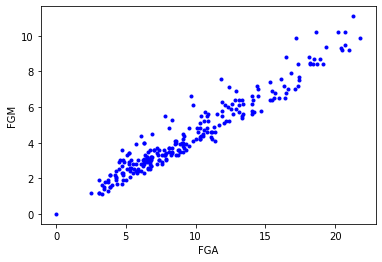

In [11]:
import matplotlib.pyplot as plt
plt.plot(X,Y, '.b')
plt.xlabel("FGA")
plt.ylabel("FGM")

# 28

In [28]:

X0 = np.ones((m,1))
Xb = np.c_[X0,X]

In [14]:
learning_rate = 0.0001
n_itet = 200


In [15]:
theta = np.zeros((2,1))
gradients = np.zeros((2,1))

In [17]:
for i in range(n_itet):
  gradients = (1.0/m)*Xb.T.dot(Xb.dot(theta)-Y)
  theta = theta - learning_rate*gradients

In [19]:
Xb.dot(theta) - Y

array([[-1.43394455e+00],
       [-2.52159304e+00],
       [-2.31209170e+00],
       [-9.06628487e-01],
       [-8.81925480e-01],
       [-1.86411076e+00],
       [-1.65864755e+00],
       [-5.35369626e-01],
       [-2.79689004e+00],
       [-9.58647553e-01],
       [-7.40832838e-01],
       [-5.16129831e-01],
       [-1.98453853e+00],
       [-1.32705625e+00],
       [-6.80500400e-01],
       [-1.06268568e+00],
       [-8.03778327e-01],
       [-8.85963612e-01],
       [-5.43723132e-02],
       [-8.98315115e-01],
       [-1.25579739e+00],
       [-9.61260605e-01],
       [ 6.20173222e-02],
       [-3.14704751e-01],
       [-5.14704751e-01],
       [-9.85963612e-01],
       [-4.95464956e-01],
       [-5.57973931e-02],
       [-1.07765024e+00],
       [-1.43445890e-01],
       [-4.66723817e-01],
       [ 1.54614680e-02],
       [-1.96933687e+00],
       [-7.76502403e-02],
       [-1.24748402e+00],
       [ 4.53504442e-03],
       [-6.58410445e-01],
       [-9.48909101e-01],
       [-3.1

In [22]:
Xb.T.dot(Xb.dot(theta) -Y)

array([[ -114.99817518],
       [-1316.19745662]])

In [23]:
theta

array([[0.03517548],
       [0.41092642]])

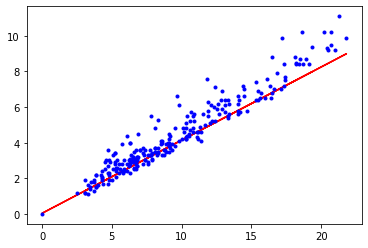

In [30]:
import matplotlib.pyplot as plt
Y_pred = Xb.dot(theta)
plt.plot(X, Y_pred, color = 'Red')
plt.plot(X, Y, '.b')

In [32]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 100, penalty = None, alpha=0.0001)
sgd_reg.fit(X, Y.ravel())

SGDRegressor(max_iter=100, penalty=None)

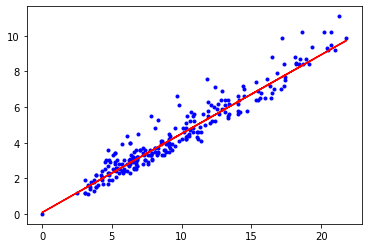

In [36]:
Y_pred = sgd_reg.predict(X)
plt.plot(X,Y,'b.')
plt.plot(X,Y_pred,'r')
plt.show()